# Classification Assignment 1 

AIML Id: 2020AIML043

AIMD hospital is a medical facility that has just hired an intern in the Machine Learning space due to the vast advancements of ML in the medical field. This facility has given the intern the data of 769 patients who have cancer and who have don’t have cancer. These patients have other conditions as well like past pregnancies, diabetes, insulin intake, etc. 
The doctors are hoping these attributes will help the intern learn & build a model to predict whether a patient is likely to have cancer or not based on certain attributes.

Assuming that you are the intern, you have to build a KNN classifier that will predict whether a patient is susceptible to cancer or not.  

You are expected to perform the following.

	Exploratory Data Analysis on the dataset

	Building the KNN classifier

	Model performance Analysis

In [85]:
# Importing required libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

In [86]:
# Reading input csv
data = pd.read_csv("Cancer_Dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. Exploratory Data Analysis on the dataset 

In [87]:
# Shape of input data
data.shape

(768, 9)

The input data contains 768 rows & 9 columns. Out of 9 columns, "Outcome" column is the target variable - meaning a person has cancer or not.

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BloodPressure   768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Cancer_Markers  768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All columns are of integer & float types only.

In [89]:
# Check for missing values
data.isnull().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64

From the above, no missing values can be seen in the input dataset.

In [90]:
# Check for duplicates
duplicates = data[data.duplicated()]
print (len(duplicates), 'duplicates found.')
duplicates = ''

0 duplicates found.


In [91]:
# Analysing the target variable - Outcome
person_wo_cancer = len(data[data['Outcome']==0])
person_with_cancer = len(data[data['Outcome']==1])

print('People diagonsed with cancer     -', person_with_cancer)
print('People diagonsed with-out cancer -', person_wo_cancer)

People diagonsed with cancer     - 268
People diagonsed with-out cancer - 500


<AxesSubplot:>

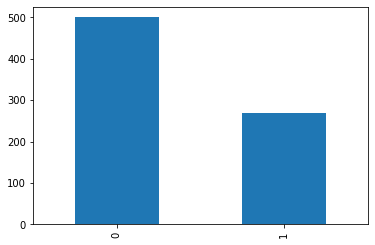

In [92]:
# Plotting bar plot for target variable 'Outcome'
data['Outcome'].value_counts().plot(kind="bar")

The above graph shows that the data is biased towards 'Outcome' value as 0. The number of persons not diagnosed with cancer are almost twice the number of persons diagnosed with cancer.

In [93]:
# Details like mean, standard deviation etc for input dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above analysis, below are the highlighted points -

1) Minimum pregnancy is 0 and maximum pregnancy is 17. <br/>
2) For Glucose, min reading is 0 and maximum is 199 - zero glucose value is impossible for a human being.<br/>
3) For BP, min reading is 0 and maximum is 122 - zero BP value is impossible for a human being.<br/>
4) For SkinThickness, min reading is 0 and maximum is 99 - zero SkinThickness value is impossible for a human being.<br/>
5) For Insulin, min reading is 0 and maximum value is 846. <br/>
6) For BMI, min  reading is 0 and maximum is 67 - zero BMI value is impossible for a human being.<br/>
7) Above columns like Glucose, BloodPressure, SkinThickness, Insulin & BMI are having 0 values - which doesn't make sense & indicates missing values for the columns.<br/>
8) Persons are distributed in the age range from 21 to 81.

<b>Need to perform data imputation techniques on Glucose, BP, Skin Thickness, Insulin & BMI columns.</b>

<b>Plotting various graphs-</b>

1. Heatmap -

<AxesSubplot:>

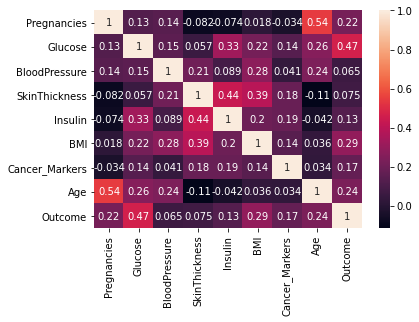

In [94]:
# Finding correlation values for all columns in input dataset
corr = data.corr()

# Plot correlation matrix for all columns
sns.heatmap(corr, annot=True)

From the above heatmap, we can deduce following observations -<br/>
1. Pregnancies & Age are moderately correlated.
2. SkinThickness is slightly correlated with Insulin & BMI.
3. Glucose is the only column, which is slightly dependent on target variable 'Outcome'.

In [95]:
# Extracting target variable 'Outcome' & independent columns in a separate variable
target_data = data.iloc[:,-1] 
input_data = data.iloc[:,0:len(data.columns)-1]

# Output columns of independent variables
input_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age'],
      dtype='object')

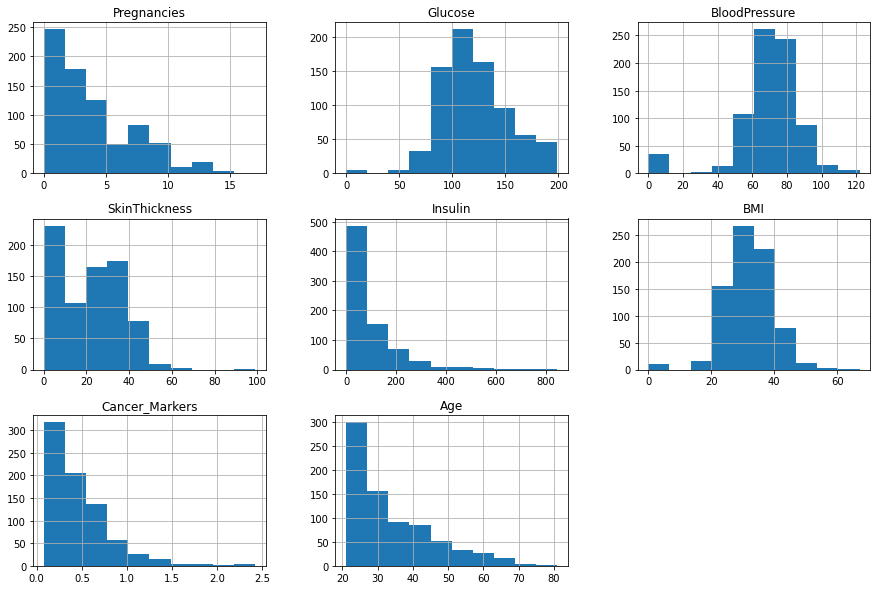

In [96]:
# Plotting histogram for all independent variables
input_data.hist(figsize = (15, 10))
plt.show()

Box plot for Pregnancies column


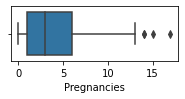

Box plot for Glucose column


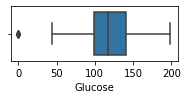

Box plot for BloodPressure column


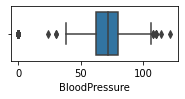

Box plot for SkinThickness column


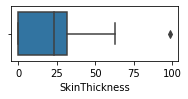

Box plot for Insulin column


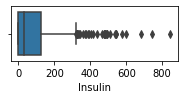

Box plot for BMI column


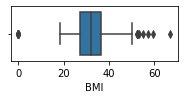

Box plot for Cancer_Markers column


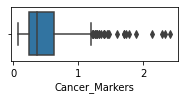

Box plot for Age column


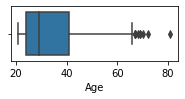

In [97]:
# Plotting box plots for all independent variables
for col in input_data.columns:
    print('Box plot for',col, 'column')
    plt.figure(figsize = (3, 1))
    sns.boxplot(x=col, data = input_data)
    plt.show()

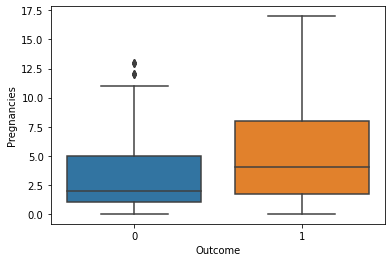

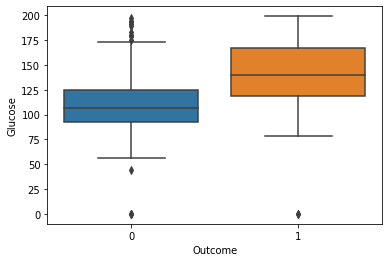

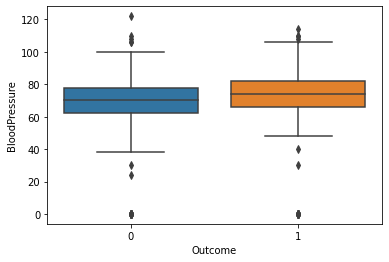

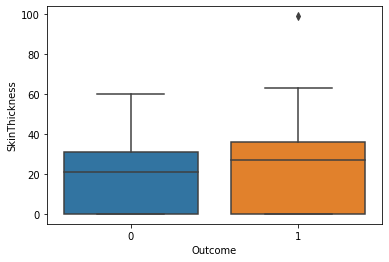

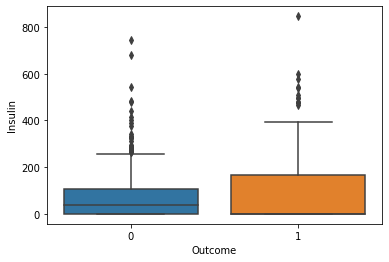

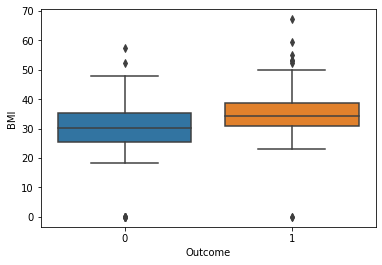

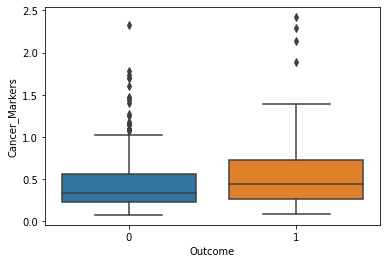

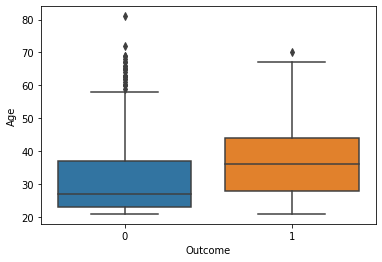

In [98]:
# Plotting box plot for all independent variables with an outlay of target
for col in input_data.select_dtypes(include=['int64', 'float32', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=input_data[col], x=target_data, data=input_data)
    plt.show()

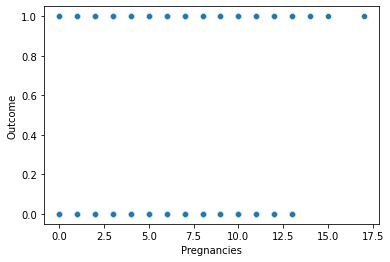

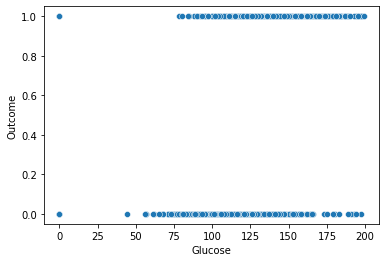

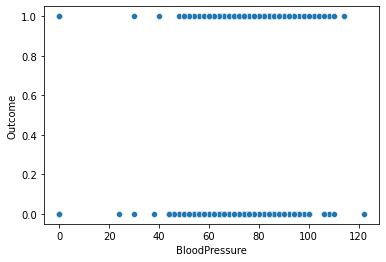

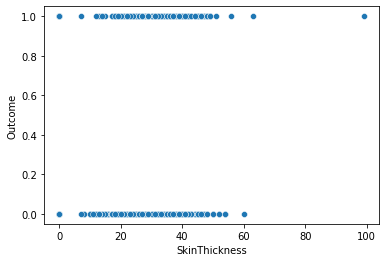

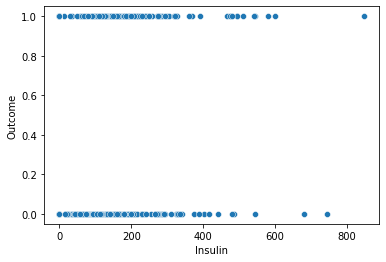

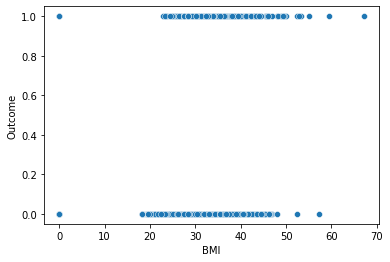

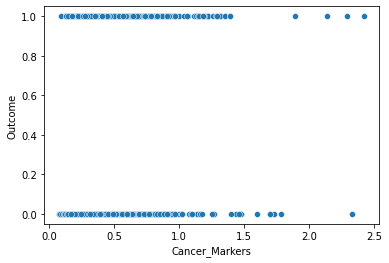

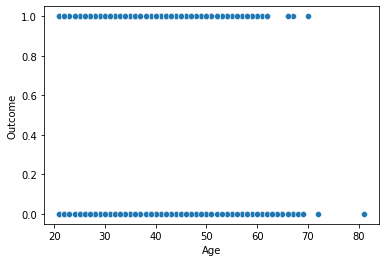

In [99]:
# Plotting scatter plots for all independent variables with target variable
for col in input_data.columns:
    sns.scatterplot(x=input_data[col], y=target_data)
    plt.show()

From the above graphs, below observations can be made -
1) Higher Glucose value have higher chances of getting cancer.<br/>
2) SkinThickness of 100 is cancer positive.<br/>
3) Cancer Markers above 2 are having higher chances of getting cancer.<br/>
4) Females with less pregnancies have low cancer positive rate.<br/>
5) Outliers also exists in the dataset - cancer_markers above 1.2 are outliers, insulin values above 500 etc.<br/>

#### Applying imputation techniques on the input variables

<b>Start with replacing '0' values with 'NaN'</b>

In [100]:
# Creating a copy of input data frame
d_copy = data.copy(deep = True)
d_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = d_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(d_copy.isnull().sum())

Pregnancies         0
Glucose             5
BloodPressure      35
SkinThickness     227
Insulin           374
BMI                11
Cancer_Markers      0
Age                 0
Outcome             0
dtype: int64


In [101]:
d_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


The 0 values in columns like Insulin, SkinThickness etc. are successfully replaced with NaN values.

In [102]:
# Extracting min & max age
min_age = data['Age'].min()
max_age = data['Age'].max()

print('Minimum Age is ', min_age)
print('Maximum Age is ', max_age)

Minimum Age is  21
Maximum Age is  81


In [103]:
# Extracting min & max values for pregnancy column
min_preg = data['Pregnancies'].min()
max_preg = data['Pregnancies'].max()

print('Minimum Pregnancies are ', min_preg)
print('Maximum Pregnancies are ', max_preg)

Minimum Pregnancies are  0
Maximum Pregnancies are  17


In [104]:
# Defining method to normalize input columns using MinMaxScaler
def normalize(df):    
    scaler = MinMaxScaler()
    norm_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    return norm_data

In [105]:
# Defining method to apply kNN imputation technique on the input dataset
def knn_imputer(df):
    imputer = KNNImputer(n_neighbors=1)
    imputed_data = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
    return imputed_data

In [106]:
# Normalize data & then apply kNN imputer to the input dataset
norm_data = normalize(d_copy)
imputed_data = knn_imputer(norm_data)
imputed_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.134615,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.049279,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.380435,0.139423,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [107]:
# Printing missing values after applying kNN imputer
imputed_data.isnull().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64

<b>Plotting various graphs after applying kNN imputer</b>

<AxesSubplot:>

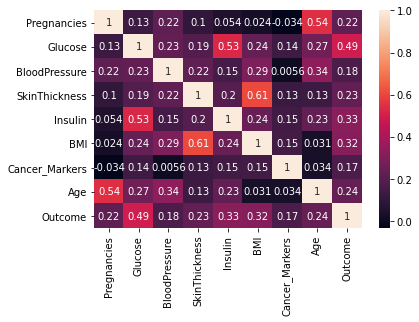

In [108]:
# Finding correlation values for all columns in input dataset
corr = imputed_data.corr()

# Plot correlation matrix for all columns
sns.heatmap(corr, annot=True)

From the above heatmap after imputation, we can deduce following observations -<br/>
1. Glucose & Insulin are moderately correlated.<br/>
2. SkinThickness & BMI are moderately correlated.<br/>

In [109]:
# Extracting target variable 'Outcome' & independent columns in a separate variable
imp_input_data = imputed_data.iloc[:, 0:len(imputed_data.columns)-1]
imp_target_data = imputed_data.iloc[:,-1]
imp_input_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age'],
      dtype='object')

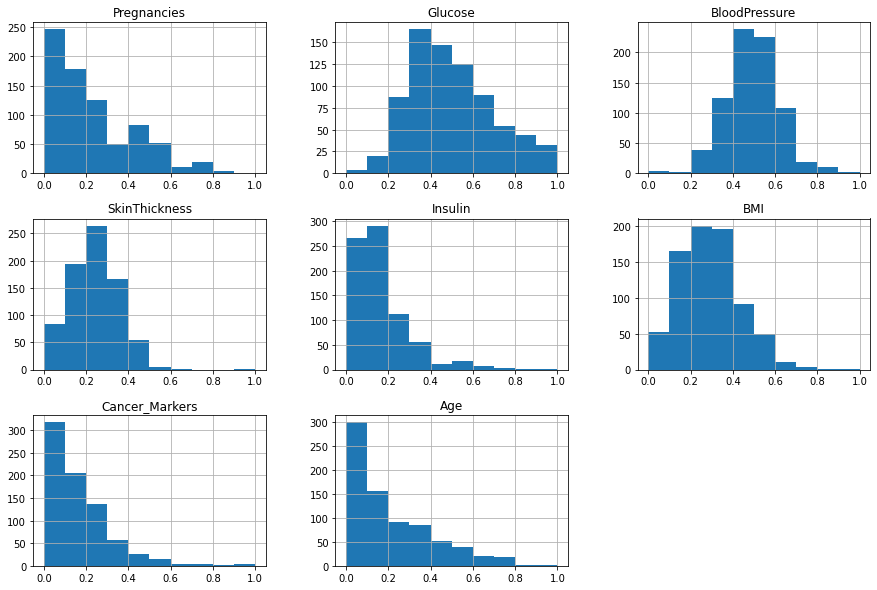

In [110]:
# Plotting histogram for all independent variables after imputation
imp_input_data.hist(figsize = (15, 10))
plt.show()

Similar distribution can be seen across all independent variables.

Box plot for Pregnancies column


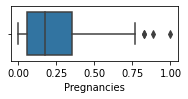

Box plot for Glucose column


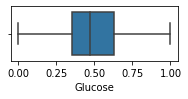

Box plot for BloodPressure column


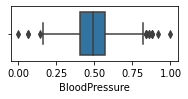

Box plot for SkinThickness column


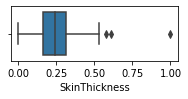

Box plot for Insulin column


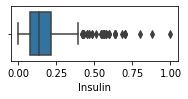

Box plot for BMI column


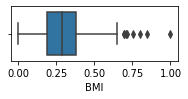

Box plot for Cancer_Markers column


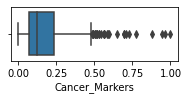

Box plot for Age column


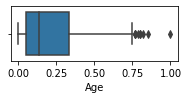

In [111]:
for col in imp_input_data.columns:
    print('Box plot for',col, 'column')
    plt.figure(figsize = (3, 1))
    sns.boxplot(x=col, data = imp_input_data)
    plt.show()

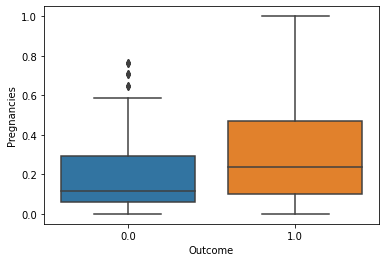

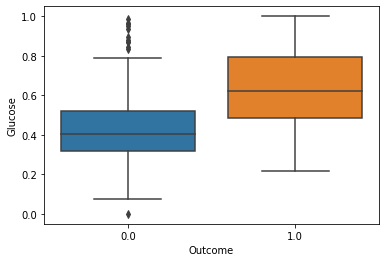

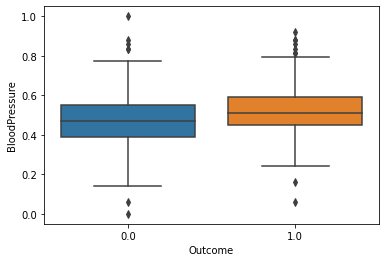

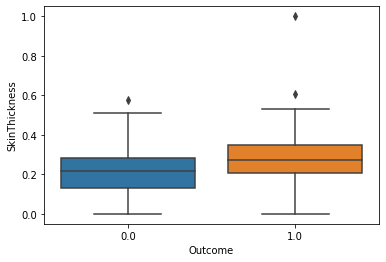

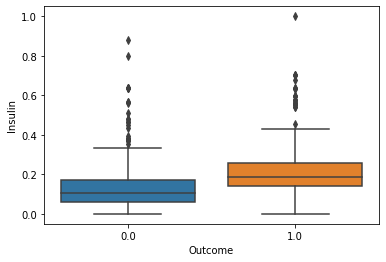

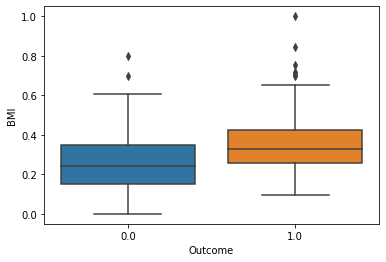

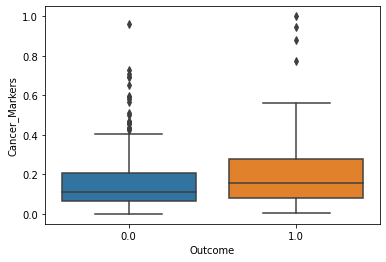

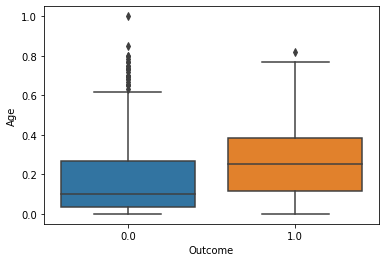

In [112]:
# Plotting box plot for all independent variables with an outlay of target
for col in imp_input_data.select_dtypes(include=['int64', 'float32', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=imp_input_data[col], x=imp_target_data, data=imp_input_data)
    plt.show()

### 2. Building the KNN classifier 

In [113]:
## 
# Function to build the knn classifier & predict the accuracy.
# Input variables - 
#    data - input dataframe
#    max_k_val - maximum k value
#    accuracy_plot - True (default value - to display accuracy plot of the trained model)
##
def knn_classifier(data, max_k_val, accuracy_plot=True):
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length - 1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e Has Rejected
    
    # Split the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0, stratify=data['Outcome'])

    neighbors = np.arange(1, max_k_val)
    train_accuracy =np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i,k in enumerate(neighbors):
        # Fit KNN to the training set
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
        
        print("Test data, Accuracy for k =",i+1,"is", test_accuracy[i])
    
    # Plotting accuracy plot
    if accuracy_plot == True:
        plt.title('k-NN Varying number of neighbors')
        plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
        plt.plot(neighbors, train_accuracy, label='Training accuracy')
        plt.xticks(range(1, 20))
        plt.legend()
        plt.xlabel('Number of neighbors')
        plt.ylabel('Accuracy')
        plt.show()

Test data, Accuracy for k = 1 is 0.72265625
Test data, Accuracy for k = 2 is 0.71484375
Test data, Accuracy for k = 3 is 0.703125
Test data, Accuracy for k = 4 is 0.72265625
Test data, Accuracy for k = 5 is 0.6953125
Test data, Accuracy for k = 6 is 0.7109375
Test data, Accuracy for k = 7 is 0.7265625
Test data, Accuracy for k = 8 is 0.74609375
Test data, Accuracy for k = 9 is 0.7421875
Test data, Accuracy for k = 10 is 0.75
Test data, Accuracy for k = 11 is 0.75390625
Test data, Accuracy for k = 12 is 0.7734375
Test data, Accuracy for k = 13 is 0.73828125
Test data, Accuracy for k = 14 is 0.75390625
Test data, Accuracy for k = 15 is 0.73828125
Test data, Accuracy for k = 16 is 0.7578125
Test data, Accuracy for k = 17 is 0.74609375
Test data, Accuracy for k = 18 is 0.76171875
Test data, Accuracy for k = 19 is 0.75


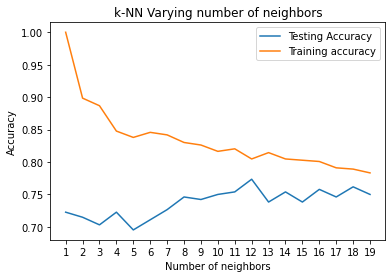

In [114]:
# Call knn classifier with max k value as 20
knn_classifier(imputed_data, 20, True)

<b>From the accuracy plot, higher test accuracy can be seen at k=12.</b>

Test data, Accuracy for k = 1 is 0.72265625
Test data, Accuracy for k = 2 is 0.71484375
Test data, Accuracy for k = 3 is 0.703125
Test data, Accuracy for k = 4 is 0.72265625
Test data, Accuracy for k = 5 is 0.6953125
Test data, Accuracy for k = 6 is 0.7109375
Test data, Accuracy for k = 7 is 0.7265625
Test data, Accuracy for k = 8 is 0.74609375
Test data, Accuracy for k = 9 is 0.7421875
Test data, Accuracy for k = 10 is 0.75
Test data, Accuracy for k = 11 is 0.75390625
Test data, Accuracy for k = 12 is 0.7734375
Test data, Accuracy for k = 13 is 0.73828125
Test data, Accuracy for k = 14 is 0.75390625
Test data, Accuracy for k = 15 is 0.73828125
Test data, Accuracy for k = 16 is 0.7578125
Test data, Accuracy for k = 17 is 0.74609375
Test data, Accuracy for k = 18 is 0.76171875
Test data, Accuracy for k = 19 is 0.75
Test data, Accuracy for k = 20 is 0.74609375
Test data, Accuracy for k = 21 is 0.74609375
Test data, Accuracy for k = 22 is 0.74609375
Test data, Accuracy for k = 23 is 0.742

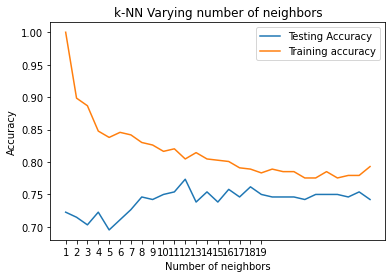

In [115]:
# Call knn classifier with max k value as 30
knn_classifier(imputed_data, 30, True)

<b>On passing max k value as 30, higher test accuracy can be seen at k=12 only.</b>

<b>Generating final knn classifier model with k=12</b>

In [116]:
# Extract x & y from imputed data & split them into train & test
col_length = len(imputed_data.columns)
X = imputed_data.iloc[:,0:col_length - 1]  #independent columns
y = imputed_data.iloc[:,-1]    #target column i.e Outcome

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0, stratify=imputed_data['Outcome'])

In [117]:
# Fit KNN to the training set
knn = KNeighborsClassifier(n_neighbors = 12) #Using k as 12
knn.fit(X_train, y_train)

# Predict the Test set results
y_pred = knn.predict(X_test)

# Get score on test data
print("Score    :", knn.score(X_test, y_test), "\n")

# Compute accuracy
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100, "\n")

Score    : 0.7734375 

Accuracy :  77.34375 



<b>Accuracy of model (with k as 12) is 77.34%</b>

### 3. Model performance Analysis

In [118]:
# Printing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[153  14]
 [ 44  45]]


In [119]:
# Printing confusion matrix using cross tab
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,153,14,167
1.0,44,45,89
All,197,59,256


In [120]:
# Printing classification report on test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84       167
         1.0       0.76      0.51      0.61        89

    accuracy                           0.77       256
   macro avg       0.77      0.71      0.72       256
weighted avg       0.77      0.77      0.76       256



<b>F1-score value is 0.84 & 0.61, which shows both cases are closer to the accuracy.</b>

Generate precision, recall values manually -

In [121]:
# Extracting TP, TN, FP & FN values (considering person having cancer as positive scenario)
true_positive = conf_matrix[1][1]
true_negative = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

print('True Positives:', true_positive)
print('True Negatives:', true_negative)
print('False Positives:', false_positive)
print('False Negatives:', false_negative)

sensitivity = true_positive / (false_negative + true_positive)
specificity = true_negative / (true_negative + false_positive)
precision = true_positive / (true_positive + false_positive)
f1_Score = 2 * (precision * sensitivity) / (precision + sensitivity)

print('f1 score:', f1_Score)

True Positives: 45
True Negatives: 153
False Positives: 14
False Negatives: 44
f1 score: 0.6081081081081081


<b>f1-score value is .608</b>

In [122]:
# Calculate probability of our test data
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_predict= knn.predict(X_test)
converted_y_test = y_test.to_numpy()

# Printing y-test, y-predicted & y predict probability values
for i in range(100):
    print(converted_y_test[i], '    ' , y_predict[i], '    ', y_pred_proba[i],"\n")

0.0      0.0      0.0 

0.0      0.0      0.16666666666666666 

0.0      0.0      0.3333333333333333 

0.0      0.0      0.5 

1.0      0.0      0.3333333333333333 

0.0      0.0      0.5 

1.0      0.0      0.5 

0.0      0.0      0.0 

1.0      0.0      0.5 

0.0      0.0      0.08333333333333333 

0.0      0.0      0.08333333333333333 

0.0      0.0      0.5 

0.0      0.0      0.5 

0.0      0.0      0.0 

1.0      1.0      0.5833333333333334 

0.0      0.0      0.08333333333333333 

0.0      0.0      0.08333333333333333 

1.0      1.0      0.5833333333333334 

0.0      1.0      0.8333333333333334 

0.0      0.0      0.5 

0.0      0.0      0.08333333333333333 

1.0      1.0      0.8333333333333334 

0.0      0.0      0.08333333333333333 

1.0      1.0      0.75 

0.0      0.0      0.08333333333333333 

1.0      1.0      0.8333333333333334 

0.0      0.0      0.08333333333333333 

0.0      0.0      0.5 

1.0      0.0      0.5 

0.0      0.0      0.3333333333333333 

1.0      0.0   

In [123]:
# Calculating FPR, TPR & threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

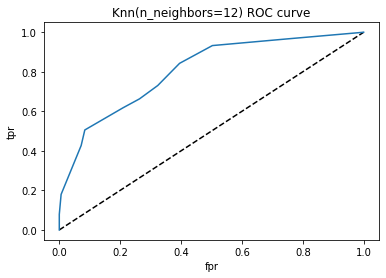

In [124]:
# Plotting FPR vs TPR
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=12) ROC curve')
plt.show()

In [125]:
roc_auc_score(y_test, y_pred_proba)

0.8057592679808921

<b>Area under ROC curve is .80</b>

--- END -----